# **Análisis de estudiantes** 🤽

### **1. Descripción de variables a tratar**

1. Age
2. Medu
3. fedu

age	Medu	Fedu	traveltime	studytime	failures	famrel	freetime	goout	Dalc	Walc	health	absences	G1	G2	G3



### **2. Importar librerías de Python**

In [51]:
##Manipulación de datos
import pandas as pd
import numpy as np
from scipy import stats

##Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

##ignorar warnings
import warnings
warnings.simplefilter('ignore')

### **3. Incorporar el Dataset**

In [52]:
estudiantes = pd.read_csv('/content/student-mat (2).csv', sep=';')
estudiantes.head()

##Not a Number = NaN.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [53]:
estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [54]:
## filtro para extraer solo variables numéricas
#prompt : dame un filtro para extraer las variables numéricas
est = estudiantes.select_dtypes(include=np.number)
est.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [55]:
##Función para detectar datos inconsistentes NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%50s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%50s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

datos_NAN(est)

Dimensiones: 395 filas, 16 columnas
Total valores NAN: 0
                                    Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                               age      int64           8          0
                                              Medu      int64           5          0
                                              Fedu      int64           5          0
                                        traveltime      int64           4          0
                                         studytime      int64           4          0
                                          failures      int64           4          0
                                            famrel      int64           5          0
                                          freetime      int64           5          0
                                             goout      int64           5          0
                                              Dalc      int64           5          0


<Axes: >

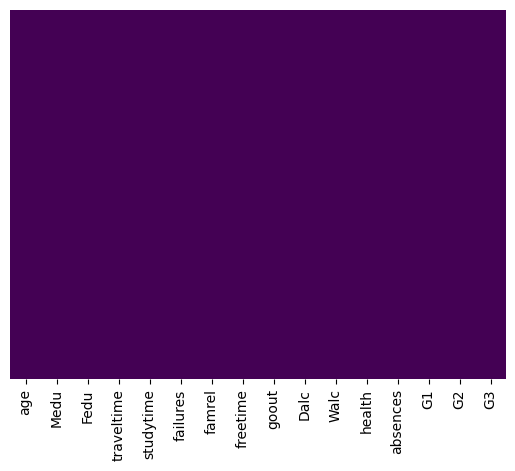

In [56]:
##Gráfica identificar datos NAN
sns.heatmap(est.isna(), yticklabels=False, cbar=False, cmap='viridis')

### **4. Multigráfica de todas las variables Densidad**

In [57]:
est.columns


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

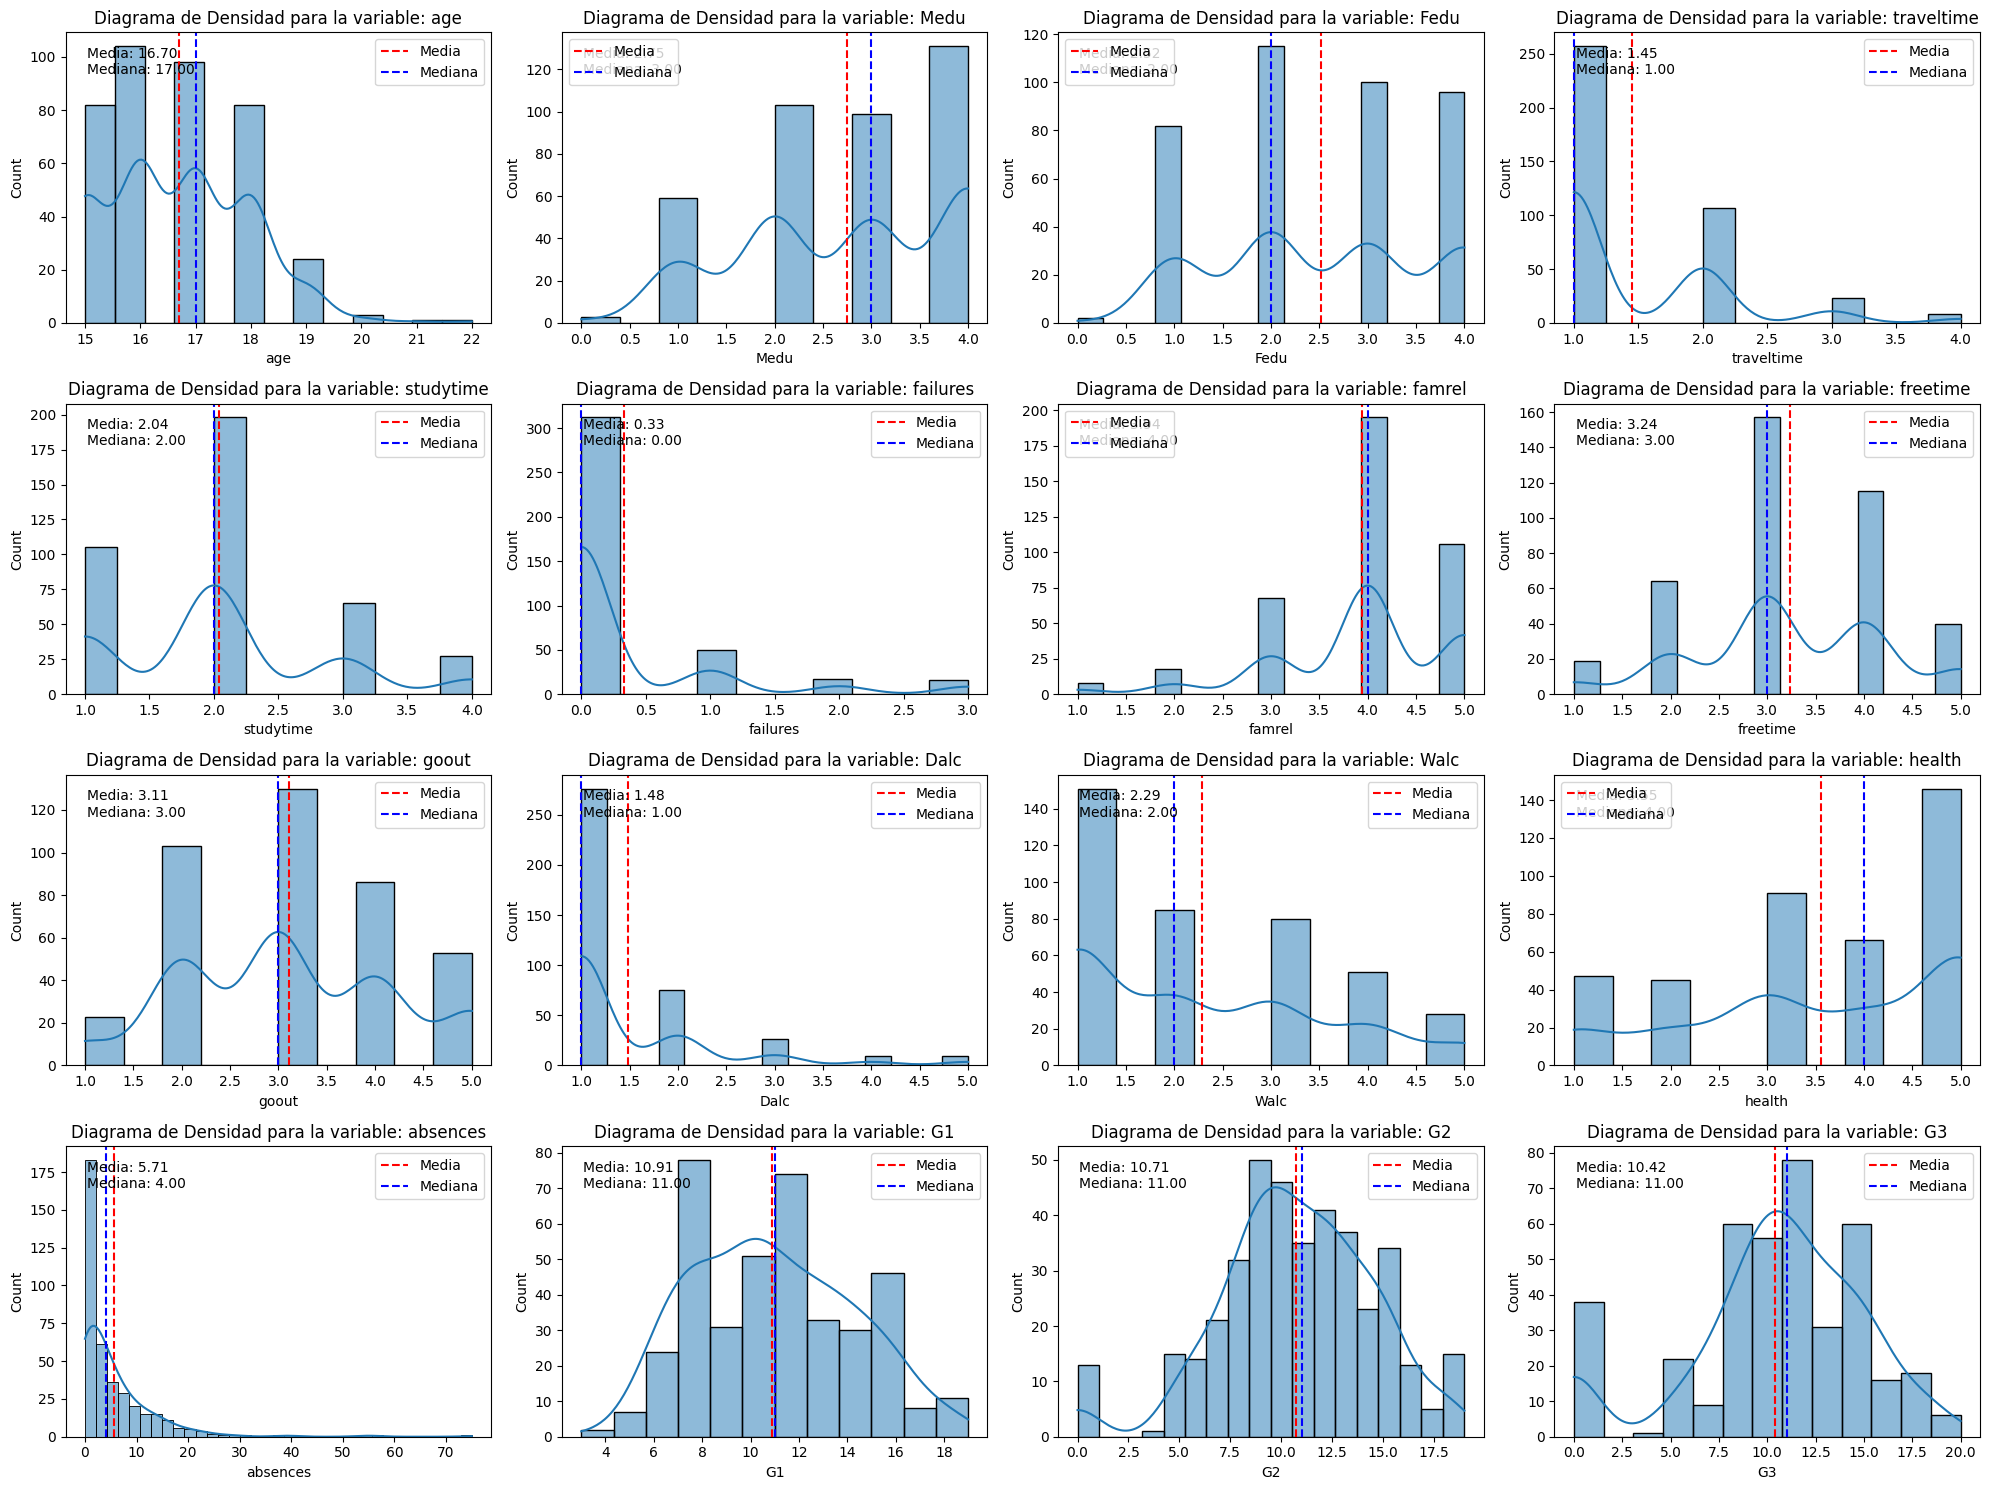

In [58]:
variables = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3']

fig, axes = plt.subplots(4,4, figsize=(20,15))

axes = axes.flatten()

for i, var in enumerate(variables):
  ax = axes[i]
  sns.histplot(est[var], kde=True, ax=ax)
  ax.axvline(est[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(est[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f'Media: {est[var].mean():.2f}\nMediana: {est[var].median():.2f}',
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

  ax.set_title(f'Diagrama de Densidad para la variable: {var}')
  ax.set_xlabel(var)
  ax.legend()

plt.tight_layout()
plt.show()


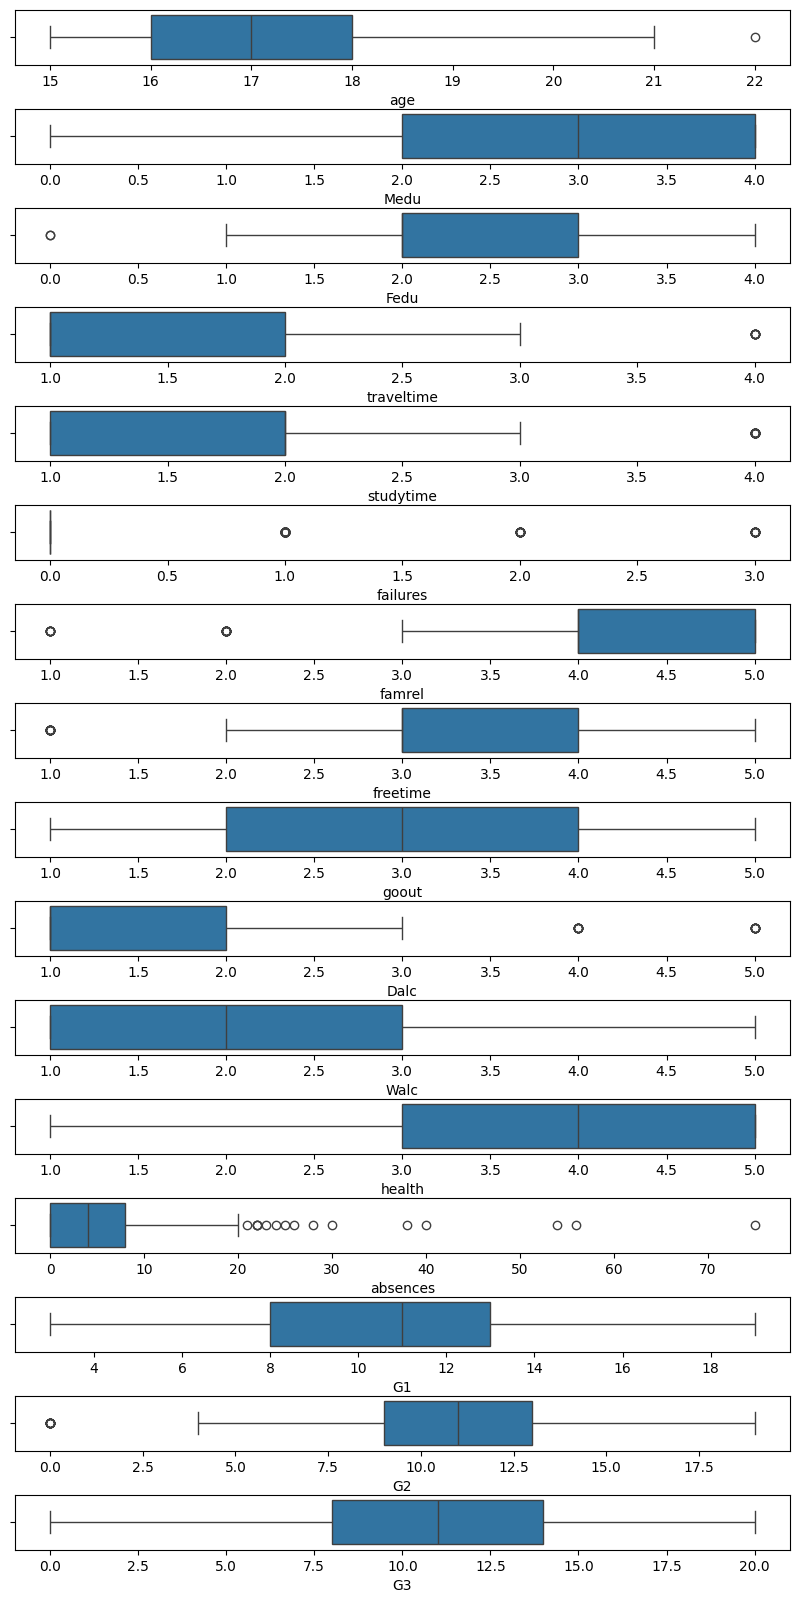

In [59]:
##Diagrama de caja
columnas = est.columns

fig, ax = plt.subplots(16,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(16):
  sns.boxplot(x=columnas[i], data=est, ax=ax[i])


In [60]:
### Porcentaje de ruido en el dataframe por columna
for k,v in est.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(est)[0]
  print('columna %s ruido= %s' % (k, porc))

columna age ruido= 0.005063291139240506
columna Medu ruido= 0.0
columna Fedu ruido= 0.005063291139240506
columna traveltime ruido= 0.020253164556962026
columna studytime ruido= 0.06835443037974684
columna failures ruido= 1.0
columna famrel ruido= 0.06582278481012659
columna freetime ruido= 0.04810126582278481
columna goout ruido= 0.0
columna Dalc ruido= 0.04556962025316456
columna Walc ruido= 0.0
columna health ruido= 0.0
columna absences ruido= 0.04810126582278481
columna G1 ruido= 0.0
columna G2 ruido= 0.04050632911392405
columna G3 ruido= 0.0


In [61]:
# Reemplazo de outliers por la mediana
df_est = est.copy()

# Definimos el umbral de outliers como aquellos valores fuera de 1.5 desviaciones estándar
for col in df_est .columns:
    mean = df_est [col].mean()
    std = df_est [col].std()
    outliers = (df_est [col] < mean - 1.5 * std) | (df_est [col] > mean + 1.5 * std)
    df_est .loc[outliers, col] = df_est [col].median()


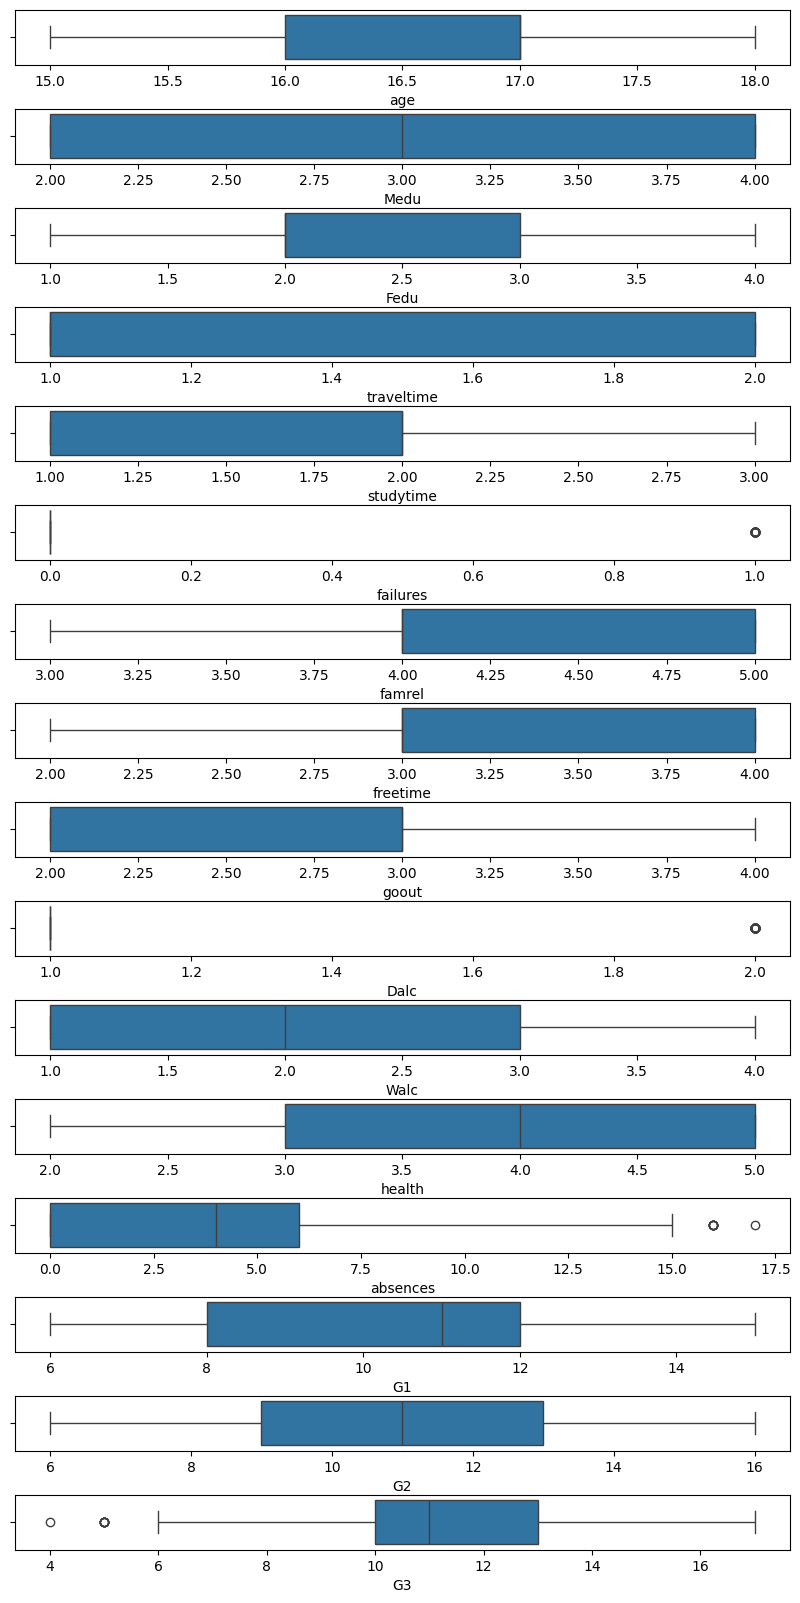

In [62]:
###Revisamos del ruido
columnas = df_est .columns

fig, ax = plt.subplots(16,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(16):
  sns.boxplot(x=columnas[i], data=df_est , ax=ax[i])

In [63]:
datos_NAN(df_est )

Dimensiones: 395 filas, 16 columnas
Total valores NAN: 0
                                    Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                               age      int64           4          0
                                              Medu      int64           3          0
                                              Fedu      int64           4          0
                                        traveltime      int64           2          0
                                         studytime      int64           3          0
                                          failures      int64           2          0
                                            famrel      int64           3          0
                                          freetime      int64           3          0
                                             goout      int64           3          0
                                              Dalc      int64           2          0


In [64]:
###Función para revisar ruido
for k,v in df_est .items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]  / np.shape(df_est )[0]
  print('Columna %s Ruido= %s' % (k, porc))

Columna age Ruido= 0.0
Columna Medu Ruido= 0.0
Columna Fedu Ruido= 0.0
Columna traveltime Ruido= 0.0
Columna studytime Ruido= 0.0
Columna failures Ruido= 1.0
Columna famrel Ruido= 0.0
Columna freetime Ruido= 0.0
Columna goout Ruido= 0.0
Columna Dalc Ruido= 1.0
Columna Walc Ruido= 0.0
Columna health Ruido= 0.0
Columna absences Ruido= 0.027848101265822784
Columna G1 Ruido= 0.0
Columna G2 Ruido= 0.0
Columna G3 Ruido= 0.020253164556962026


### **5. Normalización**

In [65]:
est.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [66]:
##https://www.linkedin.com/pulse/standardization-normalization-regularization-nikita-sharma-jauvf#:~:text=Standardization%20and%20Normalization%20are%20data,doesn%27t%20affect%20the%20data.

from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

estnorma = normaData(est)

estnorma.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,0.242315,0.182292,0.0,0.142857,0.285714,0.428571,1.0
Medu,395.0,0.687342,0.273684,0.0,0.500000,0.750000,1.000000,1.0
Fedu,395.0,0.630380,0.272050,0.0,0.500000,0.500000,0.750000,1.0
traveltime,395.0,0.149367,0.232502,0.0,0.000000,0.000000,0.333333,1.0
studytime,395.0,0.345148,0.279747,0.0,0.000000,0.333333,0.333333,1.0
failures,395.0,0.111392,0.247884,0.0,0.000000,0.000000,0.000000,1.0
famrel,395.0,0.736076,0.224165,0.0,0.750000,0.750000,1.000000,1.0
freetime,395.0,0.558861,0.249716,0.0,0.500000,0.500000,0.750000,1.0
goout,395.0,0.527215,0.278320,0.0,0.250000,0.500000,0.750000,1.0
Dalc,395.0,0.120253,0.222685,0.0,0.000000,0.000000,0.250000,1.0


### **6. Test de Normalidad**

In [67]:
##D'agostino, shapiro-wilk, jarque-bera, kolmogorov - smirnov , anderson-darling.
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(est)

,Variable,Valores P,Concepto
0,age,1.588761e-14,No es una variable Normal
1,Medu,2.815330e-18,No es una variable Normal
2,Fedu,2.707953e-17,No es una variable Normal
3,traveltime,2.310303e-27,No es una variable Normal
4,studytime,6.546204e-20,No es una variable Normal
5,failures,1.138361e-31,No es una variable Normal
6,famrel,3.906164e-20,No es una variable Normal
7,freetime,6.426758e-15,No es una variable Normal
8,goout,1.413357e-14,No es una variable Normal
9,Dalc,2.968061e-29,No es una variable Normal


In [68]:
##https://i.ytimg.com/vi/LJ_zm8Pqe_Y/maxresdefault.jpg
from scipy import stats
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

testShapiroWilk(estnorma)

,Variable,Valores P,Concepto
0,age,1.588761e-14,No es una variable Normal
1,Medu,2.815330e-18,No es una variable Normal
2,Fedu,2.707953e-17,No es una variable Normal
3,traveltime,2.310303e-27,No es una variable Normal
4,studytime,6.546204e-20,No es una variable Normal
5,failures,1.138361e-31,No es una variable Normal
6,famrel,3.906164e-20,No es una variable Normal
7,freetime,6.426758e-15,No es una variable Normal
8,goout,1.413357e-14,No es una variable Normal
9,Dalc,2.968061e-29,No es una variable Normal


### **7. Correlación**

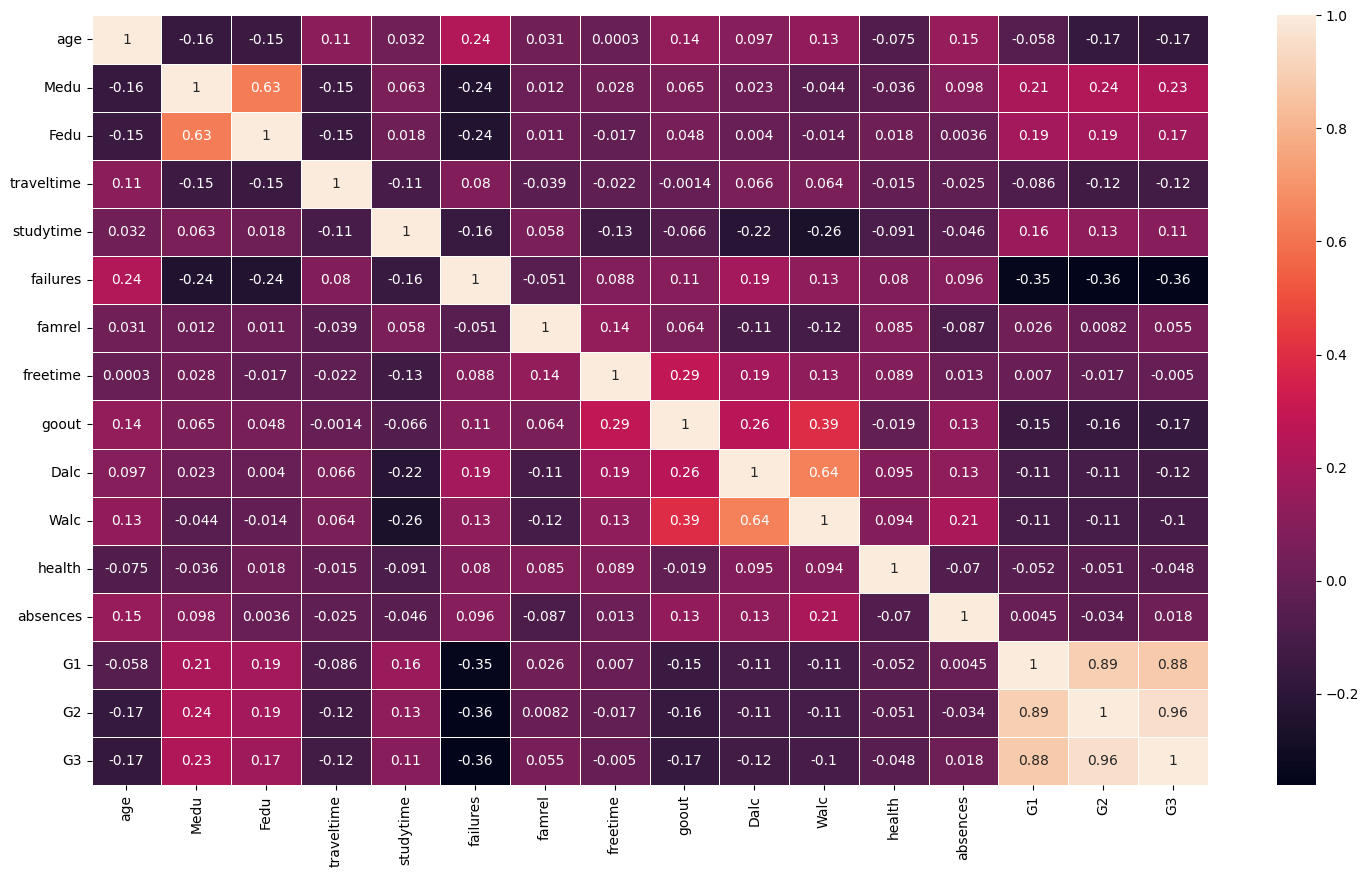

In [69]:
##La correlación es que tan estrecha esta una variable relacionada con otra,
#como puede una variable o varias definir otra; no es causalidad. -1 a 1.
def DiagCorr(df, tamuno, tamdos):
    f, ax = plt.subplots(figsize=(tamuno,tamdos))
    sns.heatmap(df.corr(method="spearman"), annot=True, linewidths=.5, ax=ax)

DiagCorr(estnorma, 18,10)

### **8. Análisis con Variables categóricas**

In [70]:
estcat = estudiantes.select_dtypes(include=['object', 'category'])
estcat

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [71]:
### frecuencia absoluta
estcat['school'].value_counts()

,count
school,
GP,349
MS,46


In [72]:
##frecuencia relativa - porción de datos pertenecen a una categoría
round(estcat['sex'].value_counts()/np.float64(len(estcat)), 4)*100

,count
sex,
F,52.66
M,47.34


In [73]:
##filtrar por gabriel pereira
estcatgp = estcat[estcat['school'] == 'GP']
estcatgp

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,GP,F,U,GT3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,yes,no
345,GP,F,U,GT3,T,other,services,other,mother,no,no,no,no,yes,yes,yes,yes
346,GP,M,R,GT3,T,teacher,services,course,mother,no,no,no,no,yes,yes,yes,yes
347,GP,M,U,GT3,T,teacher,other,course,mother,no,yes,yes,no,yes,yes,yes,yes


In [74]:
###Eliminamos columnas
estcatgp = estcatgp.drop(['school'], axis=1)
estcatgp

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,F,U,GT3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,yes,no
345,F,U,GT3,T,other,services,other,mother,no,no,no,no,yes,yes,yes,yes
346,M,R,GT3,T,teacher,services,course,mother,no,no,no,no,yes,yes,yes,yes
347,M,U,GT3,T,teacher,other,course,mother,no,yes,yes,no,yes,yes,yes,yes


In [75]:
estcatgp['Mjob'].value_counts()

,count
Mjob,
other,122
services,94
teacher,52
at_home,49
health,32


In [76]:
##Copiamos
estcatgpmix = estcatgp.copy()

In [77]:
estcatdos = estcatgp.copy()

In [78]:
##Usar label encoder en sex -https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
estcatgpmix['sex'] = le.fit_transform(estcatgpmix['sex'])
estcatgpmix

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,0,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,0,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,0,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,0,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0,U,GT3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,yes,no
345,0,U,GT3,T,other,services,other,mother,no,no,no,no,yes,yes,yes,yes
346,1,R,GT3,T,teacher,services,course,mother,no,no,no,no,yes,yes,yes,yes
347,1,U,GT3,T,teacher,other,course,mother,no,yes,yes,no,yes,yes,yes,yes


In [79]:
estcatgpmix['sex'].value_counts()

,count
sex,
0,183
1,166


In [80]:
##revisar con value_counts varias columnas
columnas = estcatgpmix.columns
for i in columnas:
  print(estcatgpmix[i].value_counts())

sex
0    183
1    166
Name: count, dtype: int64
address
U    286
R     63
Name: count, dtype: int64
famsize
GT3    252
LE3     97
Name: count, dtype: int64
Pstatus
T    311
A     38
Name: count, dtype: int64
Mjob
other       122
services     94
teacher      52
at_home      49
health       32
Name: count, dtype: int64
Fjob
other       196
services     92
teacher      27
health       18
at_home      16
Name: count, dtype: int64
reason
course        124
reputation    100
home           98
other          27
Name: count, dtype: int64
guardian
mother    245
father     78
other      26
Name: count, dtype: int64
schoolsup
no     298
yes     51
Name: count, dtype: int64
famsup
yes    224
no     125
Name: count, dtype: int64
paid
no     188
yes    161
Name: count, dtype: int64
activities
yes    185
no     164
Name: count, dtype: int64
nursery
yes    282
no      67
Name: count, dtype: int64
higher
yes    332
no      17
Name: count, dtype: int64
internet
yes    297
no      52
Name: count, dtype: i

In [81]:
##Convertir todas las columnas con label encoder
estcatgpmix = estcatgpmix.apply(le.fit_transform)
estcatgpmix

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,0,1,0,1,0,2,0,1,0,1,0,0,1,1,1,0
345,0,1,0,1,2,3,2,1,0,0,0,0,1,1,1,1
346,1,0,0,1,4,3,0,1,0,0,0,0,1,1,1,1
347,1,1,0,1,4,2,0,1,0,1,1,0,1,1,1,1


In [82]:
columnas = estcatgpmix.columns
for i in columnas:
  print(estcatgpmix[i].value_counts())

sex
0    183
1    166
Name: count, dtype: int64
address
1    286
0     63
Name: count, dtype: int64
famsize
0    252
1     97
Name: count, dtype: int64
Pstatus
1    311
0     38
Name: count, dtype: int64
Mjob
2    122
3     94
4     52
0     49
1     32
Name: count, dtype: int64
Fjob
2    196
3     92
4     27
1     18
0     16
Name: count, dtype: int64
reason
0    124
3    100
1     98
2     27
Name: count, dtype: int64
guardian
1    245
0     78
2     26
Name: count, dtype: int64
schoolsup
0    298
1     51
Name: count, dtype: int64
famsup
1    224
0    125
Name: count, dtype: int64
paid
0    188
1    161
Name: count, dtype: int64
activities
1    185
0    164
Name: count, dtype: int64
nursery
1    282
0     67
Name: count, dtype: int64
higher
1    332
0     17
Name: count, dtype: int64
internet
1    297
0     52
Name: count, dtype: int64
romantic
0    236
1    113
Name: count, dtype: int64


In [83]:
##revisamos estadísticas
estcatgpmix.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,349.0,0.475645,0.500123,0.0,0.0,0.0,1.0,1.0
address,349.0,0.819484,0.385169,0.0,1.0,1.0,1.0,1.0
famsize,349.0,0.277937,0.448625,0.0,0.0,0.0,1.0,1.0
Pstatus,349.0,0.891117,0.311939,0.0,1.0,1.0,1.0,1.0
Mjob,349.0,2.194842,1.218571,0.0,2.0,2.0,3.0,4.0
Fjob,349.0,2.275072,0.857008,0.0,2.0,2.0,3.0,4.0
reason,349.0,1.295129,1.223103,0.0,0.0,1.0,3.0,3.0
guardian,349.0,0.851003,0.525915,0.0,1.0,1.0,1.0,2.0
schoolsup,349.0,0.146132,0.353745,0.0,0.0,0.0,0.0,1.0
famsup,349.0,0.641834,0.480150,0.0,0.0,1.0,1.0,1.0


In [84]:
##test de normalidad Shapiro
testShapiroWilk(estcatgpmix)

,Variable,Valores P,Concepto
0,sex,1.378383e-26,No es una variable Normal
1,address,6.081443e-31,No es una variable Normal
2,famsize,1.083573e-28,No es una variable Normal
3,Pstatus,3.521653e-33,No es una variable Normal
4,Mjob,7.741624e-15,No es una variable Normal
5,Fjob,7.197868e-19,No es una variable Normal
6,reason,1.004314e-20,No es una variable Normal
7,guardian,1.754059e-24,No es una variable Normal
8,schoolsup,6.049522e-32,No es una variable Normal
9,famsup,1.943271e-27,No es una variable Normal


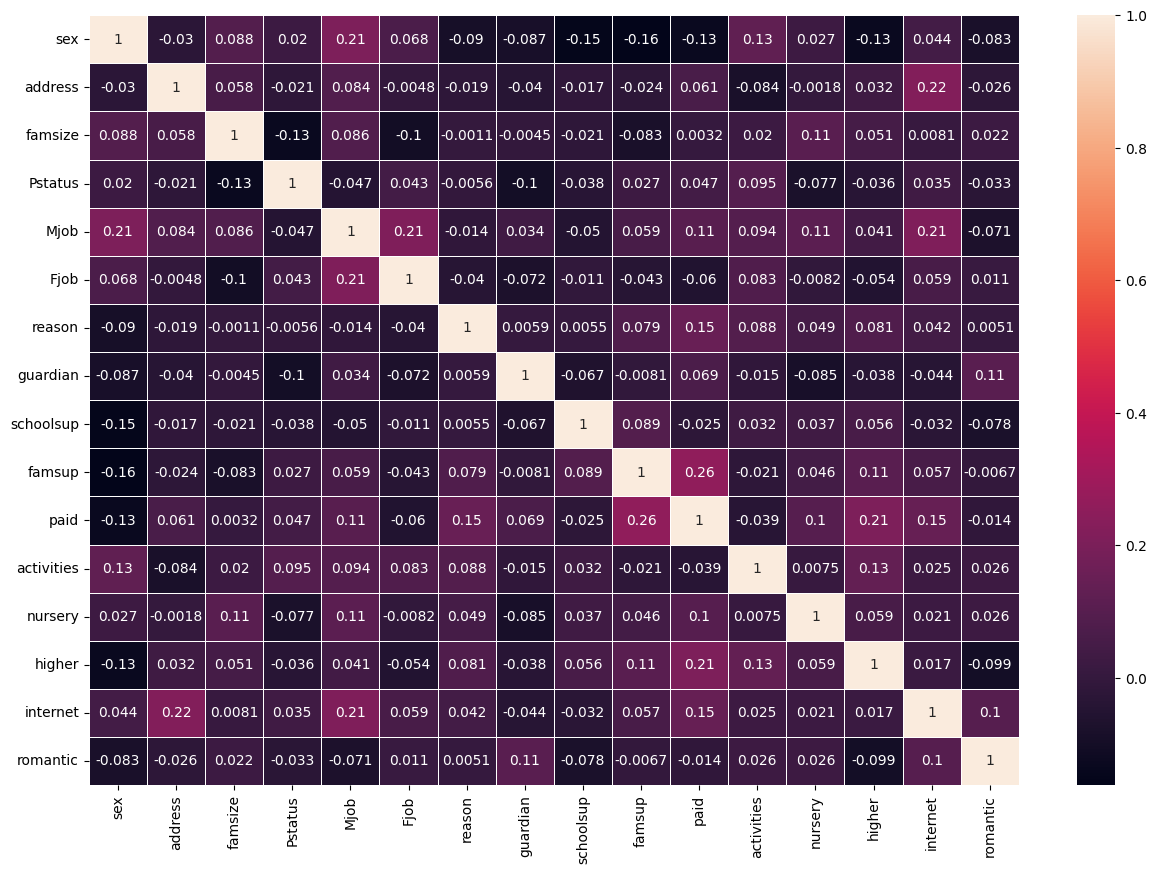

In [85]:
##Correlaciones
DiagCorr(estcatgpmix, 15,10)

### **Aplicando One Hot Encoder** 🥱

In [86]:
##Aplicar one hot encoder a estcatgp con sklearn y presentarlo como dataframe con sus columnas normales
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
estcatgp_ohe = ohe.fit_transform(estcatgp)
estcatgp_ohe = pd.DataFrame(estcatgp_ohe, columns=ohe.get_feature_names_out(estcatgp.columns))
estcatgp_ohe



,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
345,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
346,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
347,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


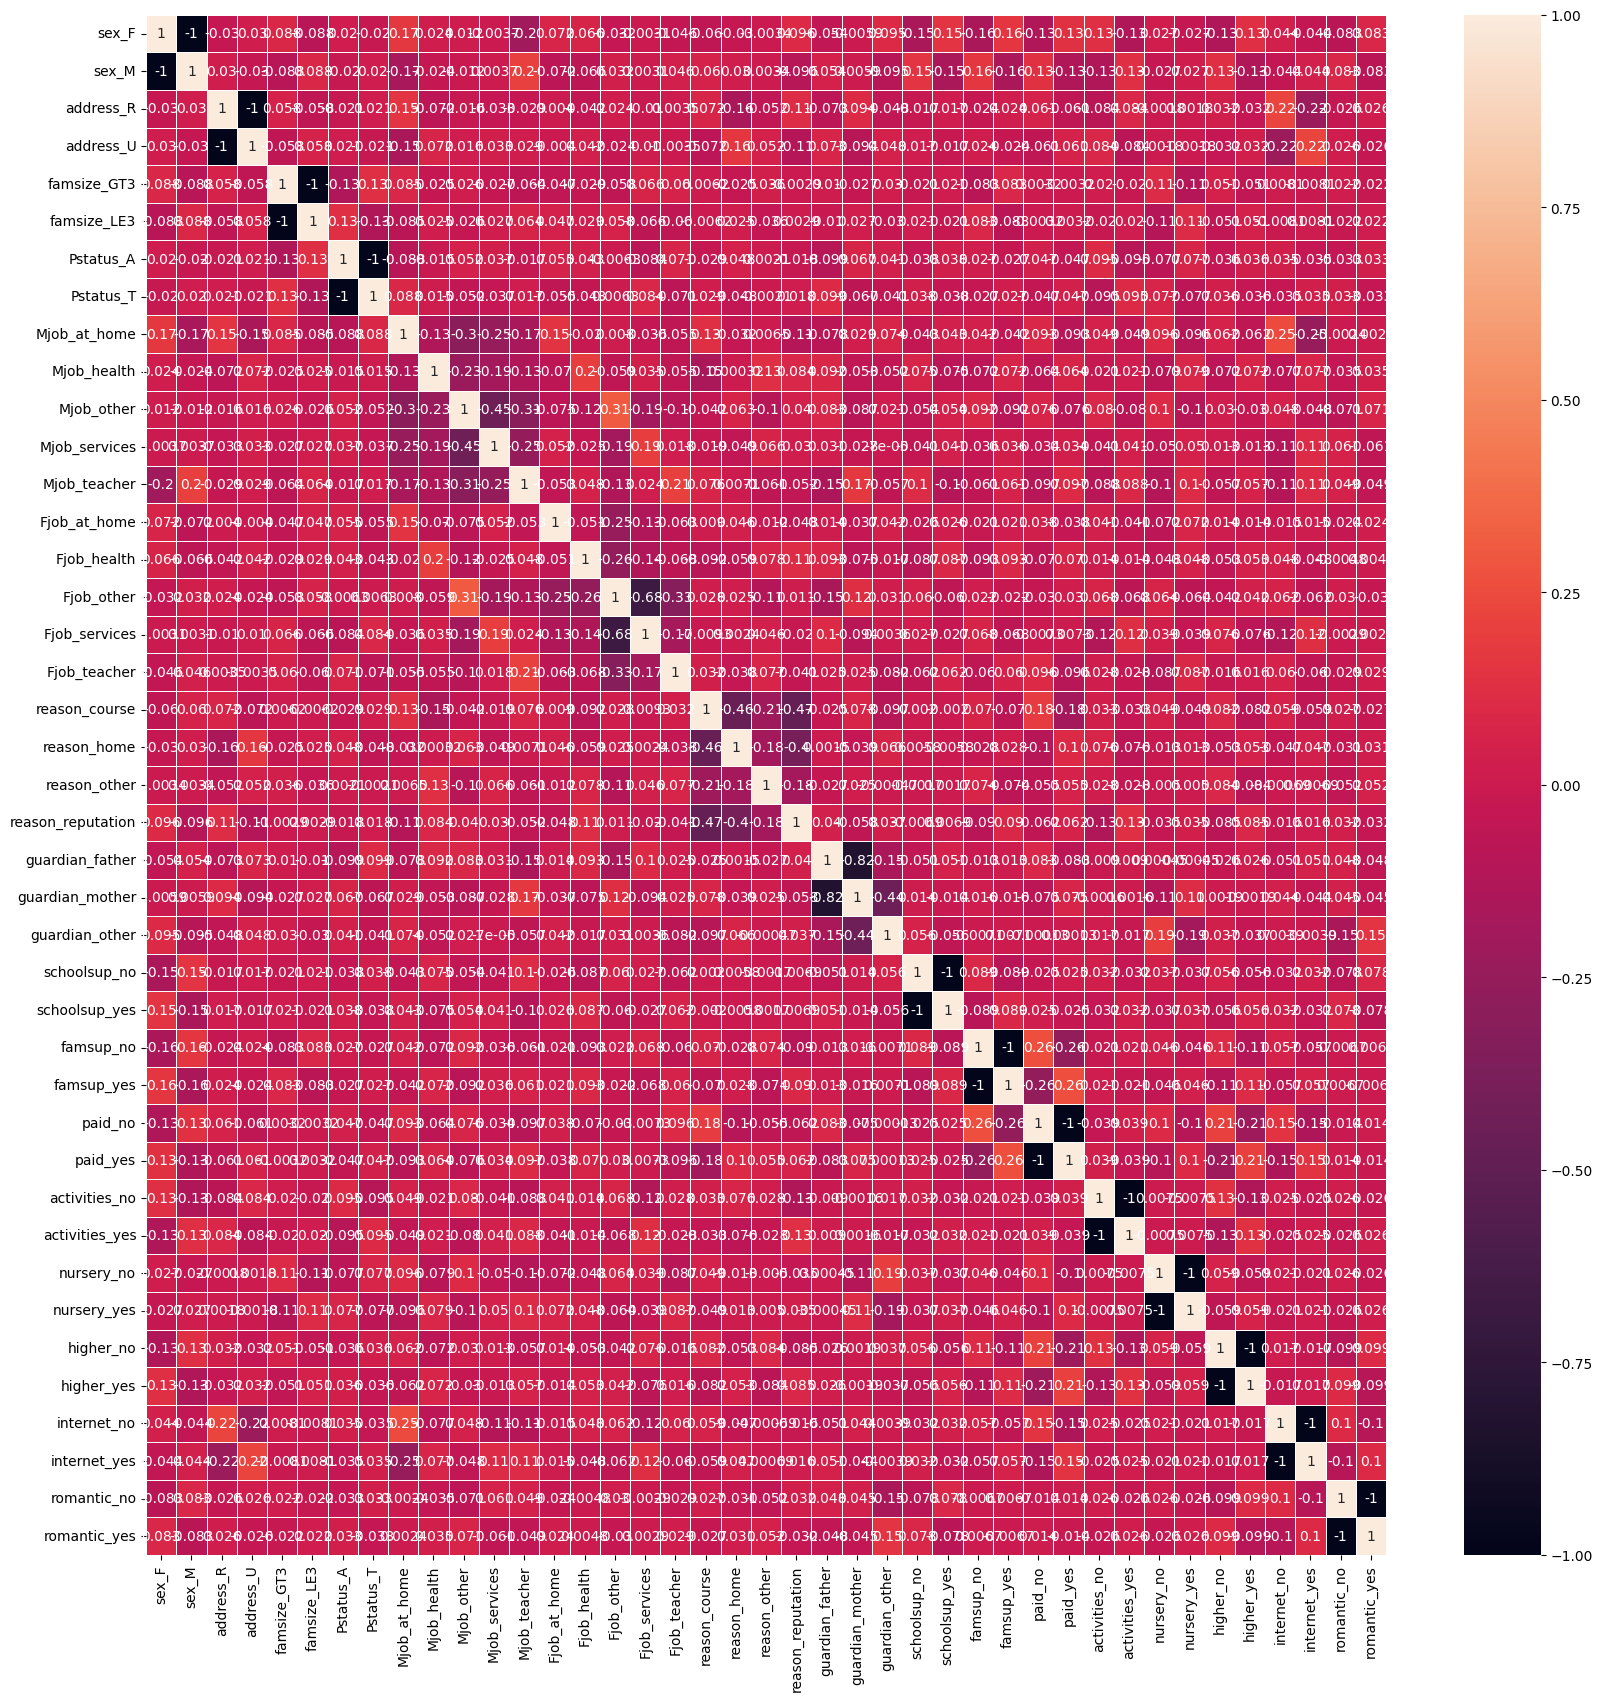

In [87]:
##Correlaciones
DiagCorr(estcatgp_ohe, 20,20)

In [88]:
##Mostrar las correlaciones en un dataframe, ver correlaciones por encima de 0.5
correlaciones = estcatgp_ohe.corr()
correlaciones = correlaciones[correlaciones > 0.5]
correlaciones

,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
sex_F,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex_M,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address_R,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address_U,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize_GT3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize_LE3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus_A,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus_T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mjob_at_home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mjob_health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
##Aplicar label encoder a columnas con máximo tres categorías (Fjob, Mjob, reason, guardian), las demas aplicar one hot encoder
for column in ['Fjob', 'Mjob', 'reason', 'guardian']:
  estcatdos[column] = le.fit_transform(estcatdos[column])

estcatdos


,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,F,U,GT3,A,0,4,0,1,yes,no,no,no,yes,yes,no,no
1,F,U,GT3,T,0,2,0,0,no,yes,no,no,no,yes,yes,no
2,F,U,LE3,T,0,2,2,1,yes,no,yes,no,yes,yes,yes,no
3,F,U,GT3,T,1,3,1,1,no,yes,yes,yes,yes,yes,yes,yes
4,F,U,GT3,T,2,2,1,0,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,F,U,GT3,T,0,2,0,1,no,yes,no,no,yes,yes,yes,no
345,F,U,GT3,T,2,3,2,1,no,no,no,no,yes,yes,yes,yes
346,M,R,GT3,T,4,3,0,1,no,no,no,no,yes,yes,yes,yes
347,M,U,GT3,T,4,2,0,1,no,yes,yes,no,yes,yes,yes,yes


In [90]:
##Aplicar conversion a 1 y 0 usando np.where a sex, address, famsize, Pstatus, schoolsup,	famsup,	paid,	activities,	nursery,	higher,	internet,	romantic
estcatdos['schoolsup'] = np.where(estcatdos['schoolsup'] == 'yes', 1, 0)
estcatdos['famsup'] = np.where(estcatdos['famsup'] == 'yes', 1, 0)
estcatdos['paid'] = np.where(estcatdos['paid'] == 'yes', 1, 0)
estcatdos['activities'] = np.where(estcatdos['activities'] == 'yes', 1, 0)
estcatdos['nursery'] = np.where(estcatdos['nursery'] == 'yes', 1, 0)
estcatdos['higher'] = np.where(estcatdos['higher'] == 'yes', 1, 0)
estcatdos['internet'] = np.where(estcatdos['internet'] == 'yes', 1, 0)
estcatdos['romantic'] = np.where(estcatdos['romantic'] == 'yes', 1, 0)
estcatdos['address'] = np.where(estcatdos['address'] == 'U', 1, 0)
estcatdos['famsize'] = np.where(estcatdos['famsize'] == 'GT3', 1, 0)
estcatdos['Pstatus'] = np.where(estcatdos['Pstatus'] == 'T', 1, 0)
estcatdos


,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,F,1,1,0,0,4,0,1,1,0,0,0,1,1,0,0
1,F,1,1,1,0,2,0,0,0,1,0,0,0,1,1,0
2,F,1,0,1,0,2,2,1,1,0,1,0,1,1,1,0
3,F,1,1,1,1,3,1,1,0,1,1,1,1,1,1,1
4,F,1,1,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,F,1,1,1,0,2,0,1,0,1,0,0,1,1,1,0
345,F,1,1,1,2,3,2,1,0,0,0,0,1,1,1,1
346,M,0,1,1,4,3,0,1,0,0,0,0,1,1,1,1
347,M,1,1,1,4,2,0,1,0,1,1,0,1,1,1,1


Pregunta de Investigación:
1. ¿Cuál es la incidencia de la nota G2 para la predicción de la nota G3?

2. ¿Cuál es la mejor eficiencia del modelo para predecir G3?

3. ¿Qué características son las mas importantes para predecir G3?

https://archive.ics.uci.edu/dataset/320/student+performance

### **9. Homoscedasticidad y Multicolinealidad**

La homocedasticidad es un supuesto importante en muchos modelos de regresión, como la regresión lineal. Se refiere a la condición en la que la varianza de los errores (residuos) es constante a lo largo de todos los valores de las variables independientes. En otras palabras, los residuos no deberían mostrar un patrón en función de los valores de las predicciones.
¿Para qué sirve?

El supuesto de homocedasticidad es crucial para la validez de la inferencia en modelos de regresión. Si este supuesto se viola (es decir, si hay heterocedasticidad), las estimaciones de los coeficientes de la regresión siguen siendo imparciales, pero las pruebas de significancia (como los valores p) y los intervalos de confianza pueden ser incorrectos, lo que afecta la validez del modelo.

In [91]:
import statsmodels.api as sm

# Definir las variables independientes y la variable dependiente
X = estnorma[['age', 'traveltime', 'famrel',
       'freetime', 'health', 'absences','G2']]
y = estnorma['G3']

# Añadir una constante a las variables independientes para el intercepto
X_with_const = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X_with_const).fit(cov_type='HC3')

# Obtener los valores ajustados (predicciones) y los residuos
fitted_vals = model.fittedvalues
residuals = model.resid

# Mostrar el resumen del modelo (opcional)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     382.5
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.46e-169
Time:                        17:47:53   Log-Likelihood:                 373.83
No. Observations:                 395   AIC:                            -731.7
Df Residuals:                     387   BIC:                            -699.8
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1426      0.032     -4.441      0.0

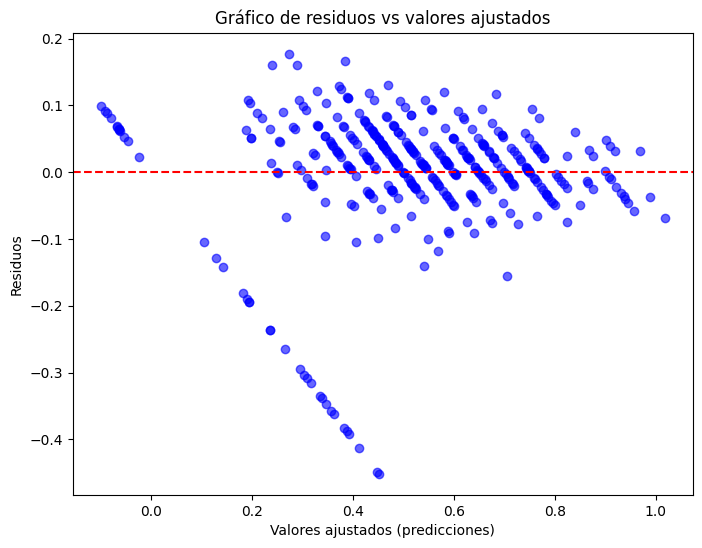

In [92]:
# Gráfico de residuos vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos vs valores ajustados')
plt.xlabel('Valores ajustados (predicciones)')
plt.ylabel('Residuos')
plt.show()

In [93]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de Breusch-Pagan para homocedasticidad
test_results = het_breuschpagan(residuals, X_with_const)

# El resultado devuelve cuatro valores: Lagrange multiplier statistic, p-value, f-value, f p-value
labels = ['Lagrange Multiplier Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, test_results)))


{'Lagrange Multiplier Statistic': 40.129305066459146, 'p-value': 1.1890528659822914e-06, 'f-value': 6.251790655196294, 'f p-value': 5.873646194748472e-07}


1. El valor p te indica si puedes rechazar la hipótesis nula de homocedasticidad.
2. Si el valor p es menor que 0.05, indica que hay heterocedasticidad.
3. Si el valor p es mayor que 0.05, no hay evidencia suficiente para rechazar la homocedasticidad.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns

# El VIF se calcula usando el variance_inflation_factor de statsmodels
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Mostrar los resultados de VIF
print(vif_data)

     Variable        VIF
0       const  31.396749
1         age   1.066539
2  traveltime   1.028274
3      famrel   1.036471
4    freetime   1.030751
5      health   1.029570
6    absences   1.038950
7          G2   1.055318


Interpretación de los resultados de VIF:

    1. Un VIF de 1 significa que no hay multicolinealidad entre esa variable y las demás.
    2. Un VIF entre 1 y 5 indica niveles aceptables de multicolinealidad.
    3. Un VIF mayor a 5 indica una multicolinealidad alta, lo que puede ser problemático para el modelo. (sqrt , logn)

### **10. Introducción a Regresión Lineal Simple**

In [95]:
##60% train 40% test - 70% train 30% test - 80% train 20% -90% train 10% test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables
##Variable independiente
X = estnorma[['G3']]
##variable a predecir o dependiente
y = estnorma['G2']

##Particionar los datos -siempre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.007512564469176264
Root Mean Squared Error (RMSE) 0.08667505101917312
R^2 Score: 0.81


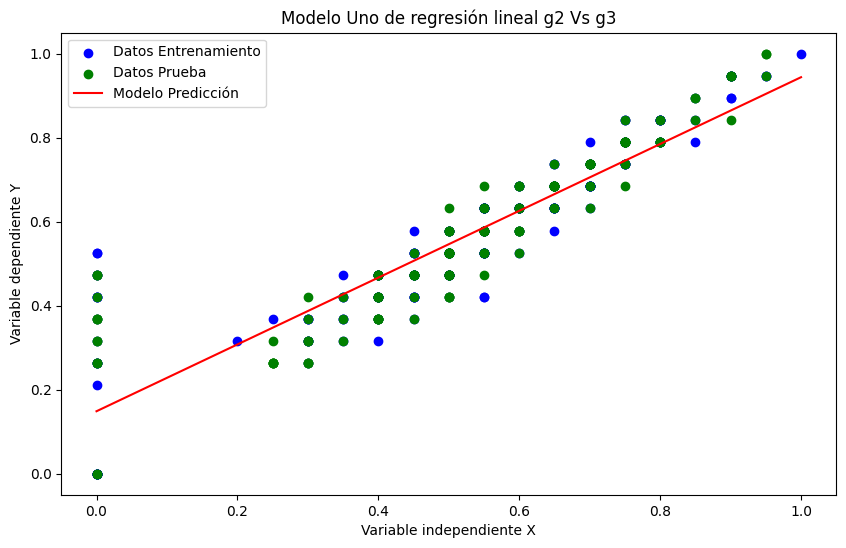

In [96]:
##Grafica del modelo
X_range = pd.DataFrame(np.linspace(X.min(), X.max(),100))
y_pred = modelouno.predict(X_range)

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X_range, y_pred, color='red', label='Modelo Predicción')
plt.title('Modelo Uno de regresión lineal g2 Vs g3')
plt.xlabel('Variable independiente X')
plt.ylabel('Variable dependiente Y')
plt.legend()

### **11. Introducción a Regresión Lineal Múltiple**

In [97]:
estnorma.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Seleccionar las variables

X = estnorma[['age', 'traveltime', 'famrel',
       'freetime', 'health', 'absences','G2']]
y = estnorma['G3']

##Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40, random_state=42)

##crear el modelo
modelouno = LinearRegression()
modelouno.fit(X_train, y_train)

##Predicciones
y_pred = modelouno.predict(X_test)

##Metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

##Calculo del R^2
r2 = round(r2_score(y_test, y_pred),3)

##Imprimir los resultados
print('Mean Squared Error (MSE)', mse)
print('Root Mean Squared Error (RMSE)', rmse)
print('R^2 Score:', r2)

Mean Squared Error (MSE) 0.009646648656516571
Root Mean Squared Error (RMSE) 0.09821735415147656
R^2 Score: 0.824
